## 영화 리뷰 분석
---
- IMDB 데이터 활용

In [16]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.datasets.imdb import load_data
from tensorflow.keras.utils import pad_sequences
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

## [1] 데이터 준비

In [17]:
# 단어사전(voca)에서 빈도가 높은 500개까지만 사용하도록 설정
(X_train, y_train), (X_test, y_test)=load_data(num_words=500) # num_words=500

In [18]:
print(f'imDF 정보 \nX_train: {X_train.shape}, y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

imDF 정보 
X_train: (25000,), y_train : (25000,)
X_test : (25000,), y_test : (25000,)


In [19]:
print(X_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [33]:
for idx in range(3):
    print(f'[{idx} - {y_train[idx]}]\n{X_train[idx]}')
    print('--------------------------------------------------------------')

[0 - 1]
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
--------------------------------------------------------------
[1 - 0]
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14

## [2] 학습용 데이터 변환
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)
- https://www.dinolabs.ai/189

In [21]:
pad_sequences(X_train)

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]])

In [22]:
print(len(pad_sequences(X_train)))

25000


In [23]:
# [2-1]데이터별 길이 결정
padded = pad_sequences(X_train)
padded

array([[  0,   0,   0, ...,  19, 178,  32],
       [  0,   0,   0, ...,  16, 145,  95],
       [  0,   0,   0, ...,   7, 129, 113],
       ...,
       [  0,   0,   0, ...,   4,   2,   2],
       [  0,   0,   0, ...,  12,   9,  23],
       [  0,   0,   0, ..., 204, 131,   9]])

In [24]:
print(padded.shape)

(25000, 2494)


In [25]:
# [2-2]데이터별 길이 변경
padded1 = pad_sequences(X_train, maxlen=100)
padded1

array([[  2,  33,   6, ...,  19, 178,  32],
       [163,  11,   2, ...,  16, 145,  95],
       [  2,   4,   2, ...,   7, 129, 113],
       ...,
       [ 11,   6,   2, ...,   4,   2,   2],
       [100,   2,   8, ...,  12,   9,  23],
       [ 78,   2,  17, ..., 204, 131,   9]])

In [26]:
print(padded1.shape)

(25000, 100)


In [27]:
# (1) 전체 리뷰의 길이 측정
all_length=np.array([len(x) for x in X_train])

print(f'all_length : {np.mean(all_length)}, {np.median(all_length)}')

np.unique(all_length)
np.unique(all_length, return_counts=True)

all_length : 238.71364, 178.0


(array([  11,   12,   13, ..., 1851, 1854, 2494]),
 array([2, 1, 2, ..., 1, 1, 1], dtype=int64))

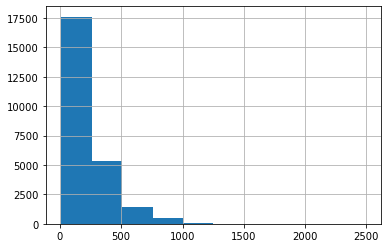

In [28]:
import matplotlib.pyplot as plt

plt.hist(all_length)
plt.grid()
plt.show()

In [45]:
# [2-2] 데이터별 길이 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100)
test_seq = pad_sequences(X_test, maxlen=100)
train_seq.shape
# to_categorical()

(25000, 100)

In [30]:
train_seq

array([[  2,  33,   6, ...,  19, 178,  32],
       [163,  11,   2, ...,  16, 145,  95],
       [  2,   4,   2, ...,   7, 129, 113],
       ...,
       [ 11,   6,   2, ...,   4,   2,   2],
       [100,   2,   8, ...,  12,   9,  23],
       [ 78,   2,  17, ..., 204, 131,   9]])

In [38]:
print(X_train[2])
print(train_seq[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 2, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2, 311, 12, 16, 2, 33, 75, 43, 2, 296, 4, 86, 320, 35, 2, 19, 263, 2, 2, 4, 2, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 2, 43, 2, 2, 8, 257, 85, 2, 42, 2, 2, 83, 68, 2, 15, 36, 165, 2, 278, 36, 69, 2, 2, 8, 106, 14, 2, 2, 18, 6, 22, 12, 215, 28, 2, 40, 6, 87, 326, 23, 2, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2, 51, 9, 170, 23, 2, 116, 2, 2, 13, 191, 79, 2, 89, 2, 14, 9, 8, 106, 2, 2, 35, 2, 6, 227, 7, 129, 113]
[  2   4   2  33  89  78  12  66  16   4 360   7   4  58 316 334  11   4
   2  43   2   2   8 257  85   2  42   2   2  83  68   2  15  36 165   2
 278  36  69   2   2   8 106  14   2   2  18   6  22  12 215  28   2  40
   6  87 326  23   2  21  23  22  12 272  40  57  31  11   4  22  47   6
   2  51   9 170  23   2 116   2   2  13 191  79   2  89   2  14   9   8
 106   2   2  35   2   6 227   7 129 113]


In [34]:
from tensorflow.keras.utils import to_categorical

In [49]:
train_oh = to_categorical(train_seq)
test_oh = to_categorical(test_seq)

In [36]:
train_oh.shape, train_oh[0]

((25000, 100, 500),
 array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [39]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_val, y_train, y_val = train_test_split(train_oh,
                                                  y_train, test_size=0.2, random_state=42)

In [50]:
print(f'X_train : {X_train.shape}\ntest_seq : {test_seq.shape}\nX_val : {X_val.shape}')
print(f'X_train : {y_train.shape}\ny_test : {y_test.shape}\ny_val : {y_val.shape}')

X_train : (20000, 100, 500)
test_seq : (25000, 100)
X_val : (5000, 100, 500)
X_train : (20000,)
y_test : (25000,)
y_val : (5000,)


# 모델
---
- 목표 : 영화리뷰 데이터 학습 후 사용자가 입력하는 리뷰가 긍정/부정 분류
- 학습모델 : RNN 순환신경망
- 입력 : 500
- 출력 : 1 => 분류 => 2진분류

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

### [3-1] 모델 구성
---
- 입력층 : 노드 n개 타임스템수, 피쳐수 => SimpleRNN
- 출력층 : 노드 1개 sigmoid => Dense
- https://wikidocs.net/22886

In [57]:
# import tensorflow as tf

# inputs = np.random.random([100, 500]).astype(np.float32)
# simple_rnn = tf.keras.layers.SimpleRNN(1)

# output = simple_rnn(inputs)

# simple_rnn = tf.keras.layers.SimpleRNN(1, return_sequences=True,
#                                        return_sequences=True)

# whole_sequence_output, final_state = simple_rnn(inputs)

In [58]:
model=Sequential()
model.add(SimpleRNN(9, input_shape=(100, 500)))   # 1개 노드 = w500+b+hw9 * 9
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 9)                 4590      
                                                                 
 dense (Dense)               (None, 1)                 10        
                                                                 
Total params: 4,600
Trainable params: 4,600
Non-trainable params: 0
_________________________________________________________________


### [3-2] 모델 생성
---
- 손실함수, 최적화방법, 평가항목 => compile()

In [60]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

### [4] 학습
---
- train 데이터와 타겟으로 학습 진행
- epoch마다 검증 진행 => validation_data, validation_split
- 학습 진행 내용 조절 => callbacks=[]
- 학습 진행 내용 조절 => verbose
- 학습 횟수 조절 => epochs
- 배치사이즈 조절 => batch_size (기:32)

In [65]:
from keras.callbacks import EarlyStopping
earlyST=EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.fit(X_train, y_train, batch_size=32,
          epochs = 100, validation_data = (X_val,y_val),
          verbose = 1, callbacks=[earlyST])

Epoch 1/100
625/625 [==============================] - 8s 12ms/step - loss: 0.2810 - accuracy: 0.8887 - val_loss: 0.6311 - val_accuracy: 0.7540
Epoch 2/100
625/625 [==============================] - 8s 12ms/step - loss: 0.2766 - accuracy: 0.8916 - val_loss: 0.6499 - val_accuracy: 0.7536
Epoch 3/100
625/625 [==============================] - 8s 13ms/step - loss: 0.2772 - accuracy: 0.8888 - val_loss: 0.6727 - val_accuracy: 0.7116
Epoch 4/100
598/625 [===========================>..] - ETA: 0s - loss: 0.2924 - accuracy: 0.8814

### [5] 평가